
<i> torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, ...) </i> is the main function to create a Maximum Pooling Layer in Pytorch.


<i> torch.nn.BatchNorm2d(num_features, eps=1e-05, momentum=0.1, ...) </i> is the main function to create a Batch Normalization Layer in Pytorch. <br><br>

<b> Quick Tip</b><br>
Be aware that the num_features parameter is the number of features maps expected as the input 

Note that batch size is not an info required by network, its us to concatanate multiple images to obtain a batch in any batch size we want. Since batch size is not a parameter effecting the network structure, we don't see any difference while we create our convolutional or other type layers. <u> For example in convolutional layer, it doesnt convert our input data to a 4D data to process at ones, 3D data is processed one by one until all the batch is processed by the layer. </u>


Import the libraries and create a cnn with 1 convolutional layer, 1 maximum pooling 
layer with size 2x2 and 1 batch normalization layer which expects 4 input data (having batch size = 4)

In [1]:
from torchvision import  transforms
import cv2
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Code will run on", device)


convlayer  = torch.nn.Conv2d(3, 12, 5, stride=1, padding="same")
batchlayer = torch.nn.BatchNorm2d(12)
activation_func = torch.nn.ReLU()
poollayer = torch.nn.MaxPool2d(2, 2)



Code will run on cpu


Load 4 images and create a batch from them. <br><br>
<b> Quick Tip </b><br>
Additionally to our first exercise, here we need to compose some 
transforms to our input images to be able to concatanate them in a batch variable with is a 4D tensor. To do so, we need to be sure that all of our input images are in the same size so we use Resize transform to obtain 240x240 images, before that we need to transform our cv2 read image (a numpy array) to a PIL image since its type that Resize transform expects, and finally we convert our data to a torch just tensor as before.

After arranging our input images, we concatanate them to obtain final batch tensor containing 4 images.

In [2]:
img1 = cv2.imread("data_flowers/daisy/100080576_f52e8ee070_n.jpg") 
img2 = cv2.imread("data_flowers/daisy/102841525_bd6628ae3c.jpg") 
img3 = cv2.imread("data_flowers/daisy/105806915_a9c13e2106_n.jpg") 
img4 = cv2.imread("data_flowers/daisy/11642632_1e7627a2cc.jpg") 

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((240,240)),
    transforms.ToTensor()
])  


img1 = transform(img1)
img2 = transform(img2)
img3 = transform(img3)
img4 = transform(img4)

img1 = img1.unsqueeze(0)
img2 = img2.unsqueeze(0)
img3 = img3.unsqueeze(0)
img4 = img4.unsqueeze(0)

batch = torch.cat((img1, img2, img3, img4), 0)

print(batch.shape)

torch.Size([4, 3, 240, 240])


### Apply convolution

After applying the convolution, we visualize the first 12 feature maps. (There are 3 more since our batch size is 4)
Then we print the values of first feature map in this 12 feature maps using:
``` 
if i == 0: 
   print(filter) 
```


output feature maps shape after convolutional layer torch.Size([4, 12, 240, 240])
tensor([[ 0.2260,  0.2728,  0.0833,  ...,  0.0726,  0.0225, -0.0816],
        [ 0.1487,  0.1036, -0.0862,  ..., -0.1095, -0.0333, -0.1116],
        [ 0.2272,  0.2997,  0.0612,  ...,  0.0385,  0.0226, -0.0961],
        ...,
        [ 0.0847,  0.0982,  0.0363,  ...,  0.0413,  0.0300, -0.0657],
        [ 0.0504,  0.0554,  0.0093,  ..., -0.0361, -0.0158, -0.1187],
        [ 0.0243,  0.0103,  0.0007,  ..., -0.0914, -0.0103, -0.1263]])


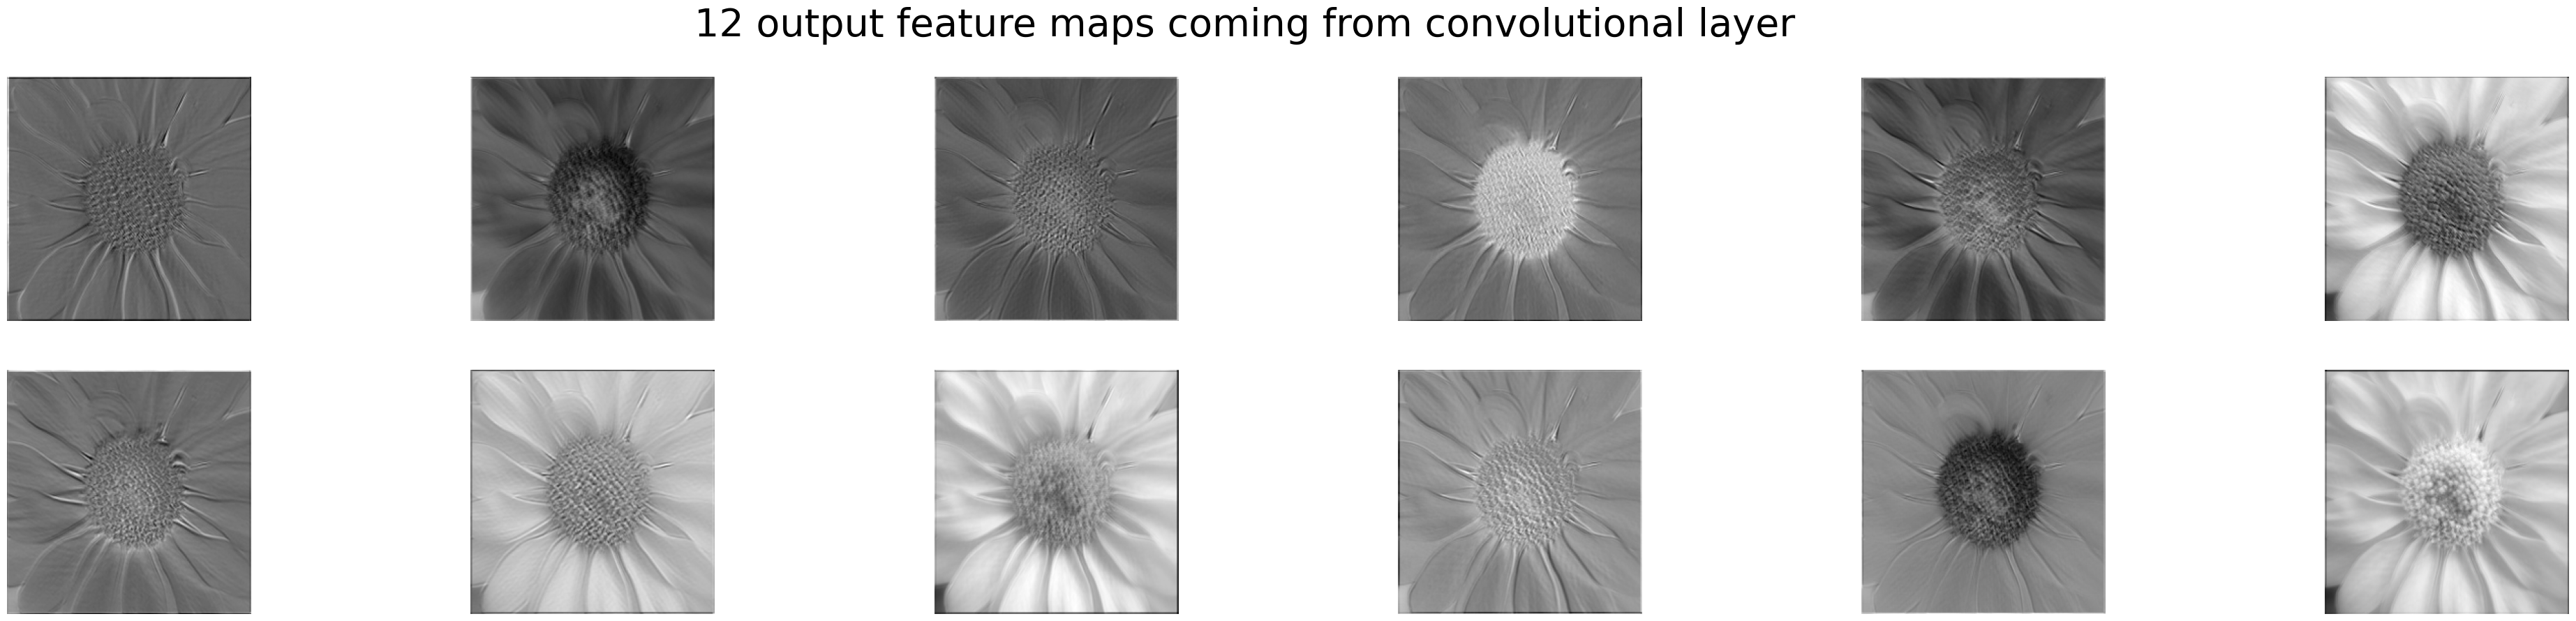

In [3]:
output = convlayer(batch)

print("output feature maps shape after convolutional layer", output.shape)

plot_title = "12 output feature maps coming from convolutional layer"

plt.figure(figsize=(50, 10))
for feature_map in output:
    layer_viz = output[0, :, :, :]
    layer_viz = layer_viz.data
for i, filter in enumerate(layer_viz):
    plt.subplot(2, 6, i + 1)
    plt.imshow(filter.detach().cpu().numpy(), cmap='gray')
    plt.axis("off")
    plt.suptitle(plot_title, fontsize=40)
    if i == 0:
        print(filter)



### Apply Batch Normalization

output feature maps shape after batch norm layer torch.Size([4, 12, 240, 240])
tensor([[ 3.3653,  4.2067,  0.7972,  ...,  0.6046, -0.2966, -2.1687],
        [ 1.9747,  1.1635, -2.2510,  ..., -2.6708, -1.2991, -2.7085],
        [ 3.3859,  4.6899,  0.3999,  ..., -0.0073, -0.2936, -2.4287],
        ...,
        [ 0.8234,  1.0656, -0.0477,  ...,  0.0421, -0.1614, -1.8829],
        [ 0.2061,  0.2961, -0.5326,  ..., -1.3491, -0.9844, -2.8354],
        [-0.2642, -0.5160, -0.6872,  ..., -2.3448, -0.8854, -2.9730]])


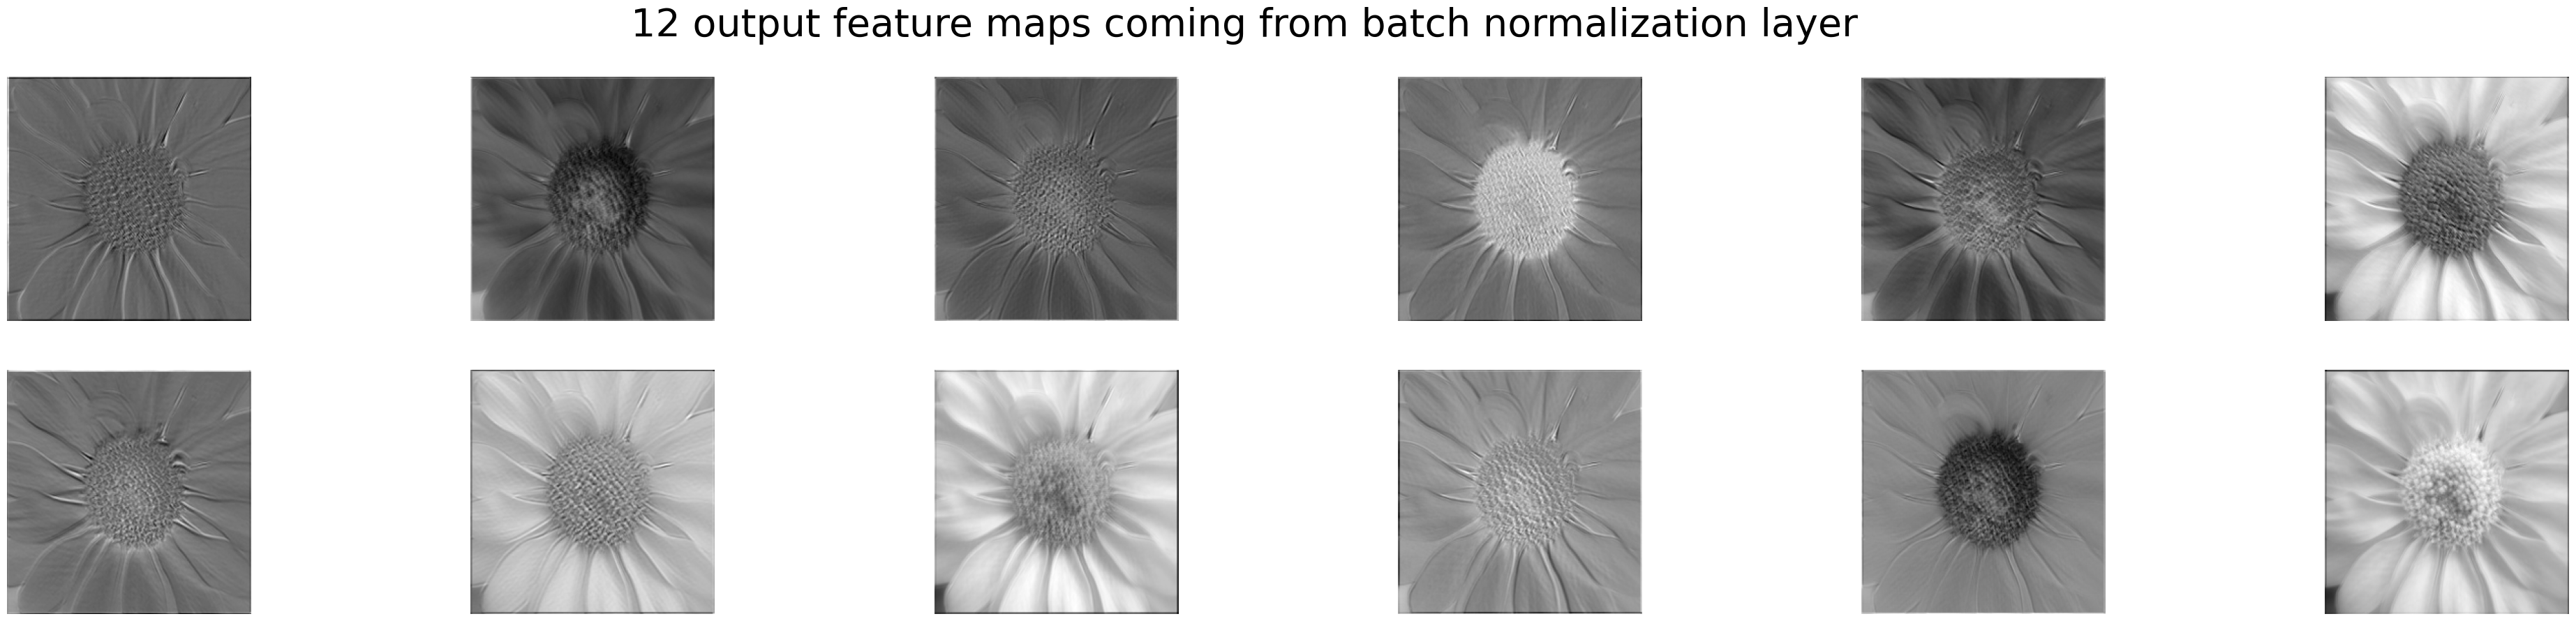

In [4]:
output = batchlayer(output)

print("output feature maps shape after batch norm layer", output.shape)

plot_title = "12 output feature maps coming from batch normalization layer"

plt.figure(figsize=(50, 10))
for feature_map in output:
    layer_viz = output[0, :, :, :]
    layer_viz = layer_viz.data
for i, filter in enumerate(layer_viz):
    plt.subplot(2, 6, i + 1)
    plt.imshow(filter.detach().cpu().numpy(), cmap='gray')
    plt.axis("off")
    plt.suptitle(plot_title, fontsize=40)
    if i == 0:
        print(filter)

### Apply Activation Function & Max Pooling

In [5]:
output = activation_func(output)
output = poollayer(output)

print("output feature maps shape after max pooling layer", output.shape)

output feature maps shape after max pooling layer torch.Size([4, 12, 120, 120])
